In [1]:
from astropy.table import Table, join, Column
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# My module
from nor_sep import pos_max_calc
from error_inflation_progs import error_inflation

In [2]:
# Read ICRF2 data
t_icrf2 = Table.read("/Users/Neo/Astronomy/Data/catalogs/icrf/icrf2.fits")

# Error ellipse major axis
eema_icrf2 = pos_max_calc(t_icrf2["ra_err_icrf2"], 
                          t_icrf2["dec_err_icrf2"], 
                          t_icrf2["ra_dec_corr_icrf2"])
t_icrf2.add_column(eema_icrf2, name="eema_icrf2")

print("\n ICRF2 catalog: \n", t_icrf2)


 ICRF2 catalog: 
    icrf_name     ivs_name iers_name sou_type ... Nexp  Nobs      eema_icrf2    
                                             ...                    mas        
---------------- -------- --------- -------- ... ---- ----- -------------------
J000020.3-322101 2357-326  2357-326        V ...    1    40  0.9246019563265486
J000053.0+405401 2358+406  2358+406        V ...    1    22   2.152292650197704
J000105.3-155107 2358-161  2358-161        V ...    1    58  0.9620600872877471
J000107.0+605122 2358+605  2358+605        V ...    1    11   3.605165102961252
J000108.6+191433 2358+189  2358+189        N ...   21   716 0.09870723270272877
J000211.9-215309 2359-221  2359-221        N ...    1     3   41.72301021726925
J000315.9-194150 0000-199  0000-199        V ...    1    11  14.334803393512692
J000318.6-192722 0000-197  0000-197        V ...    2    76   0.952893953362143
J000319.3+212944 0000+212  0000+212        V ...    2    66  1.2901253012295737
J000404.9-114858 0001

In [3]:
# Read Gaia DR2_IERS data
from my_progs.catalog.read_gaia import read_dr2_iers
t_gaia2 = read_dr2_iers()

# Error ellipse semi-major axis
eema_gaia2 = pos_max_calc(t_gaia2["ra_err"], 
                          t_gaia2["dec_err"], 
                          t_gaia2["ra_dec_corr"])
t_gaia2.add_column(eema_gaia2, name="eema_gaia2")

print("\n Gaia DR2 catalog: \n", t_gaia2)


 Gaia DR2 catalog: 
 iers_name      source_id      ...   bp_rp         eema_gaia2    
                              ...    mag             mas        
--------- ------------------- ... ---------- -------------------
 2357-326 2314315845817748992 ...  0.5830784  0.1459297058023392
 2358-161 2415835442333250688 ... 0.48862648 0.20605283885027792
 2359-221 2340552087337605248 ...  1.5507584  0.4831047772372843
 0000-199 2365814049884978048 ... 0.67082596    0.31218319151974
 0000-197 2365855384650325376 ...  1.1098347 0.24241216451703895
 0001-120 2421598528234887680 ...  1.0441742 0.33998919727933147
 0001+459  387054966590038656 ...  0.9890442   0.777985787941841
 0002-478 4978016560925910400 ... 0.77326584  0.4046925099699907
 0002+541  420305499589122944 ... 0.74580574 0.14545837311323823
 0002-170 2414919854088816640 ...  0.3460827 0.12802895680534068
      ...                 ... ...        ...                 ...
 2355-534 6521373648123690752 ...  0.6429157   0.142284498229031
 23

In [4]:
# Read source position from two VLBI decimation solutions.
t_opa = Table.read("../data/opa-sx-180425.cat", format="ascii",
                   names=["ivs_name", "iers_name", "ra_opa", "dec_opa",
                          "ra_err_opa", "dec_err_opa", "ra_dec_corr_opa",
                          "epo_mean", "epo_beg", "epo_end",
                          "num_sess", "num_obs", "num_obsr", "flg"],
                   exclude_names=["epo_mean", "epo_beg", "epo_end", "num_obsr", "flg"])

# Error ellipse semi-major axis
eema_opa = pos_max_calc(t_opa["ra_err_opa"],
                        t_opa["dec_err_opa"],
                        t_opa["ra_dec_corr_opa"])
t_opa.add_column(eema_opa, name="eema_opa")

print("\n OPA solution: \n", t_opa)


 OPA solution: 
 ivs_name iers_name     ra_opa     ... num_sess num_obs       eema_opa      
-------- --------- -------------- ... -------- ------- --------------------
2357-326  2357-326   0.0849999277 ...        4     237   0.2096329481709724
2358+406  2358+406   0.2211711097 ...        3     152  0.18405488402200262
2358-161  2358-161   0.2722030522 ...        3     245  0.18266630253007043
2358+605  2358+605   0.2795825651 ...        3     172  0.17153657022521349
2358+189  2358+189   0.2859232033 ...      167    3600 0.026601506788671878
2359-221  2359-221   0.5499227783 ...        2      19   1.2472534739142882
0000-199  0000-199   0.8164558477 ...        3     182   0.2577713806290392
0000-197  0000-197     0.82781263 ...        4     233   0.3328535643952115
0000+212  0000+212   0.8306250566 ...        2      66   0.6842065587506281
0000-160  0000-160   0.8636006379 ...        3     177   0.3232376904831473
     ...       ...            ... ...      ...     ...                

In [5]:
# Load results of scale factor and noise floor
sf_RA, nf_RA, sf_Dec, nf_Dec = np.genfromtxt(
    "../logs/nf_sf.dat", usecols=(1, 3, 5, 7), unpack=True)

# Inflate the formal error
# 1) ----------------
# Result of DSM
dRAc_err_inf0 = error_inflation(t_opa["ra_err_opa"], sf_RA[0], nf_RA[0])
dDec_err_inf0 = error_inflation(t_opa["dec_err_opa"], sf_Dec[0], nf_Dec[0])

# Error ellipse semi-major axis
eema_dsm = pos_max_calc(dRAc_err_inf0,
                        dDec_err_inf0,
                        t_opa["ra_dec_corr_opa"])
t_opa.add_columns([dRAc_err_inf0, dDec_err_inf0, eema_dsm], 
                  names=["ra_err_dsm", "dec_err_dsm", "eema_dsm"])


# 2) ----------------
# Result of SBL
dRAc_err_inf1 = error_inflation(t_opa["ra_err_opa"], sf_RA[1], nf_RA[1])
dDec_err_inf1 = error_inflation(t_opa["dec_err_opa"], sf_Dec[1], nf_Dec[1])

# Error ellipse semi-major axis
eema_sbl = pos_max_calc(dRAc_err_inf1,
                        dDec_err_inf1,
                        t_opa["ra_dec_corr_opa"])
t_opa.add_columns([dRAc_err_inf1, dDec_err_inf1, eema_sbl], 
                  names=["ra_err_sbl", "dec_err_sbl", "eema_sbl"])
print("\n OPA solution: \n", t_opa)


 OPA solution: 
 ivs_name iers_name     ra_opa     ...     dec_err_sbl            eema_sbl      
-------- --------- -------------- ... -------------------- --------------------
2357-326  2357-326   0.0849999277 ...   0.2480376485694057   0.2480858801017659
2358+406  2358+406   0.2211711097 ...  0.21604851590557153   0.2185395318007089
2358-161  2358-161   0.2722030522 ...  0.21604851590557153  0.21629537862766535
2358+605  2358+605   0.2795825651 ...  0.16037418023223063  0.22029434941005585
2358+189  2358+189   0.2859232033 ...  0.03365336621260939 0.033656096330358015
2359-221  2359-221   0.5499227783 ...    1.428970186824078   1.4836525366893558
0000-199  0000-199   0.8164558477 ...  0.30483768284442786  0.30494289711480654
0000-197  0000-197     0.82781263 ...   0.3924892873871081   0.3939125777038744
0000+212  0000+212   0.8306250566 ...    0.788839878557087   0.8136162156995687
0000-160  0000-160   0.8636006379 ...  0.38150197443032974   0.3824368785667543
     ...       ...    

In [6]:
# Cross-match between these three tables
t_tmp = join(t_icrf2, t_gaia2, keys="iers_name")
t_com = join(t_opa, t_tmp, keys="iers_name")

print("\n Common sources: \n", t_com)


 Common sources: 
 ivs_name_1 iers_name     ra_opa     ...   bp_rp         eema_gaia2    
                                    ...    mag             mas        
---------- --------- -------------- ... ---------- -------------------
  0000-197  0000-197     0.82781263 ...  1.1098347 0.24241216451703895
  0000-199  0000-199   0.8164558477 ... 0.67082596    0.31218319151974
  0001+459  0001+459   1.0671985215 ...  0.9890442   0.777985787941841
  0001-120  0001-120   1.0204791794 ...  1.0441742 0.33998919727933147
  0002+051  0002+051   1.3342311868 ... 0.64835835 0.06716510720786427
  0002+541  0002+541   1.2681806333 ... 0.74580574 0.14545837311323823
  0002-170  0002-170    1.324724147 ...  0.3460827 0.12802895680534068
  0002-478  0002-478   1.1485645336 ... 0.77326584  0.4046925099699907
  0003+123  0003+123   1.5960670893 ...  0.4863453 0.09314344710537147
  0003+380  0003+380   1.4882307994 ...  1.7173595 0.22845829198943232
       ...       ...            ... ...        ...       

In [7]:
# Median error in right ascension
med_ra = np.array([
#     np.median(t_com["ra_err_opa"]),
                   np.median(t_com["ra_err_dsm"]),
                   np.median(t_com["ra_err_sbl"]),
                   np.median(t_com["ra_err_icrf2"]),
                   np.median(t_com["ra_err"])]) * 1.e3

# Median error in declination
med_dec = np.array([
#     np.median(t_com["dec_err_opa"]),
                    np.median(t_com["dec_err_dsm"]),
                    np.median(t_com["dec_err_sbl"]),
                    np.median(t_com["dec_err_icrf2"]),
                    np.median(t_com["dec_err"])]) * 1.e3

# Median error in semi-major axis of error ellipse
med_eema = np.array([
#     np.median(t_com["eema_opa"]),
                     np.median(t_com["eema_dsm"]),
                     np.median(t_com["eema_sbl"]),
                     np.median(t_com["eema_icrf2"]),
                     np.median(t_com["eema_gaia2"])]) * 1.e3

print(med_ra)
print(med_dec)
print(med_eema)

[135.52407615 121.42978538 315.13907041 233.42049627]
[218.89469828 192.39050386 600.95       214.30034725]
[225.34858977 198.5943834  614.60420344 265.13177841]


/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


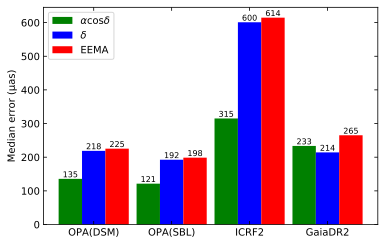

In [8]:
# Plot for median error
fig, ax = plt.subplots()

barwidth = 0.3
# data
# catalogs = ("OPA", "OPA(DSM)", "OPA(SBL)", "ICRF2", "GaiaDR2")
catalogs = ("OPA(DSM)", "OPA(SBL)", "ICRF2", "GaiaDR2")
ra_pos = np.arange(len(catalogs)) - barwidth
dec_pos = np.arange(len(catalogs))
max_pos = np.arange(len(catalogs)) + barwidth

ra = ax.bar(ra_pos, med_ra,  width=barwidth, align='center',
            color='g', ecolor='black', label="$\\alpha\cos\delta$")
dec = ax.bar(dec_pos, med_dec,  width=barwidth, align='center',
             color='b', ecolor='black', label="$\\delta$")
eema = ax.bar(max_pos, med_eema,  width=barwidth, align='center',
              color='r', ecolor='black', label="EEMA")

ax.set_xticks(dec_pos)
# ax.set_xticklabels(catalogs, rotation="vertical")
ax.set_xticklabels(catalogs)
# ax.set_ylim([0, 0.8])
ax.set_ylabel('Median error ($\mathrm{\mu as}$)')
# ax.yaxis.grid()  # horizontal lines

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.00*height,
                "%d" % int(height), fontsize=8,
                ha="center", va="bottom")


autolabel(ra)
autolabel(dec)
autolabel(eema)

ax.legend(loc="upper left")

plt.savefig("../plots/catalog_comparison.eps")

In [10]:
print("GaiaDR2/OPA:",
      "\n ra ", np.median(t_com["ra_err"])/np.median(t_com["ra_err_opa"]),
      "\n dec ", np.median(t_com["dec_err"])/np.median(t_com["dec_err_opa"]),
      "\n eema ", np.median(t_com["eema_gaia2"])/np.median(t_com["eema_opa"]))

print("GaiaDR2/OPA(DSM):",
      "\n ra ", np.median(t_com["ra_err"])/np.median(t_com["ra_err_dsm"]),
      "\n dec ", np.median(t_com["dec_err"])/np.median(t_com["dec_err_dsm"]),
      "\n eema ", np.median(t_com["eema_gaia2"])/np.median(t_com["eema_dsm"]))

print("GaiaDR2/OPA(SBL):",
      "\n ra ", np.median(t_com["ra_err"])/np.median(t_com["ra_err_sbl"]),
      "\n dec ", np.median(t_com["dec_err"])/np.median(t_com["dec_err_sbl"]),
      "\n eema ", np.median(t_com["eema_gaia2"])/np.median(t_com["eema_sbl"]))

GaiaDR2/OPA: 
 ra  2.4884914314707185 
 dec  1.319177268420922 
 eema  1.5931163880205057
GaiaDR2/OPA(DSM): 
 ra  1.722354454682445 
 dec  0.9790111361261186 
 eema  1.1765406594224872
GaiaDR2/OPA(SBL): 
 ra  1.9222672224928368 
 dec  1.113882145722097 
 eema  1.335041675737435


In [11]:
print("ICRF2/OPA:",
      "\n ra ", np.median(t_com["ra_err_icrf2"])/np.median(t_com["ra_err_opa"]),
      "\n dec ", np.median(t_com["dec_err_icrf2"])/np.median(t_com["dec_err_opa"]),
      "\n eema ", np.median(t_com["eema_icrf2"])/np.median(t_com["eema_opa"]))

print("ICRF2/OPA(DSM):",
      "\n ra ", np.median(t_com["ra_err_icrf2"])/np.median(t_com["ra_err_dsm"]),
      "\n dec ", np.median(t_com["dec_err_icrf2"])/np.median(t_com["dec_err_dsm"]),
      "\n eema ", np.median(t_com["eema_icrf2"])/np.median(t_com["eema_dsm"]))

print("ICRF2/OPA(SBL):",
      "\n ra ", np.median(t_com["ra_err_icrf2"])/np.median(t_com["ra_err_sbl"]),
      "\n dec ", np.median(t_com["dec_err_icrf2"])/np.median(t_com["dec_err_sbl"]),
      "\n eema ", np.median(t_com["eema_icrf2"])/np.median(t_com["eema_sbl"]))

ICRF2/OPA: 
 ra  3.359691582198346 
 dec  3.699292089873808 
 eema  3.6930164861221084
ICRF2/OPA(DSM): 
 ra  2.3253364226126823 
 dec  2.7453839892987966 
 eema  2.7273487891484143
ICRF2/OPA(SBL): 
 ra  2.5952369875463526 
 dec  3.123594917348613 
 eema  3.0947713269615638
